## Q.1 

Mathmatical formula for SVM - W(transpose)*X+b = 0

# Q.2 
### Objective Function of a Linear SVM
The objective function of a linear SVM is to find the hyperplane that maximizes the margin between two classes while correctly classifying the training data.

# Q.3
### . Kernel Trick in SVM
The kernel trick is a technique used in SVMs to allow linear classifiers to create non-linear decision boundaries. It involves using a kernel function to map the input data into a higher-dimensional space where a linear separation is possible.
### Types of kernel - 
* Linear Kernal
* Polynomial Kernal
* Redial Besis Function (RBF) Kernal

# Q.4
### Role of Support Vectors in SVM
Support vectors are the data points that lie closest to the decision boundary (or hyperplane) and are critical in defining the position and orientation of the hyperplane. These points are the most informative elements of the training set because they determine the margin of the classifier.

Example:
Consider a simple binary classification problem with two classes (blue and red points). The support vectors are the points that lie on the margin boundaries or violate the margin in the case of a soft margin SVM. These points directly influence the optimal hyperplane that separates the classes.

# Q.5
#### Illustrations with Examples and Graphs
Let's illustrate the concepts with examples and graphs.

Hyperplane:
The hyperplane is the decision boundary that separates different classes. In a 2D feature space, it's a line.

Marginal Plane:
The marginal planes are the planes parallel to the hyperplane and passing through the support vectors.

Hard Margin:
A hard margin SVM does not allow any misclassification. The objective is to maximize the margin between the classes without allowing any points inside the margin boundaries.

Soft Margin:
A soft margin SVM allows some misclassification to achieve a better generalization. It introduces slack variables to allow some points to violate the margin.

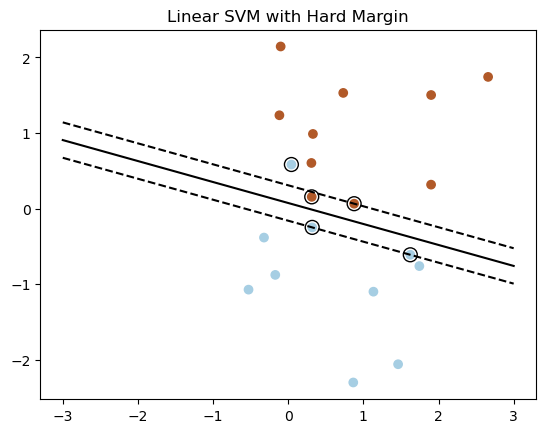

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate some data for illustration
np.random.seed(1)
X = np.random.randn(20, 2)
Y = np.array([0]*10 + [1]*10)

# Shift class 1 data
X[Y == 1] += 1

# Create a linear SVM
svm = SVC(kernel='linear', C=1000)
svm.fit(X, Y)

# Get the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (svm.intercept_[0]) / w[1]

# Plot the data and the separating hyperplane
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')

# Plot support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the margins
yy_down = yy - 1 / w[1]
yy_up = yy + 1 / w[1]
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.title('Linear SVM with Hard Margin')
plt.show()


# Q.6


In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
data = load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df = df[df['target'] !=2]

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [21]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [26]:
X_train.shape,y_train.shape,X_test.shape

((75, 4), (75,), (25, 4))

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(X_train,y_train)

SVC()

In [30]:
y_pred  = svc.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))

1.0


In [40]:
parameters = {'C':[0.1,1,10,100],
             'kernel':['linear','poly','rbf','sigmoid'],
             'gamma':[1,0.1,0.01,0.001]}

In [41]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
clf = GridSearchCV(svc,param_grid=parameters,cv=5,refit=True,verbose=3)

In [39]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


ValueError: Invalid parameter 'kernal' for estimator SVC(C=0.1, gamma=1). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].